In [ ]:
  # 6.1

In [ ]:
!pip install fastapi sse_starlette httpx langserve langfuse langchain-openai langchain langgraph langchain_community -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.4/294.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2

In [ ]:
from langchain_openai import AzureOpenAI
import os
from google.colab import userdata

os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_VERSION"] = "2024-05-01-preview"
os.environ["AZURE_OPENAI_API_KEY"] = userdata.get('AZ_OPENAI_KEY')
os.environ["AZURE_OPENAI_ENDPOINT"] =  "https://azopenai-demo.openai.azure.com/"

llm = AzureOpenAI(deployment_name="dp-gpt-35-turbo-instruct", model_name="gpt-35-turbo-instruct")

In [ ]:
import os
from langfuse import Langfuse

# Get keys for your project from the project settings page
# https://cloud.langfuse.com
os.environ["LANGFUSE_PUBLIC_KEY"] = userdata.get('LANGFUSE_PUBLIC_KEY')
os.environ["LANGFUSE_SECRET_KEY"] = userdata.get('LANGFUSE_SECRET_KEY')
os.environ["LANGFUSE_HOST"] = "https://us.cloud.langfuse.com" # 🇺🇸 US region


import os
from langchain_openai import AzureOpenAI
from google.colab import userdata

os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_VERSION"] = "2024-05-01-preview"
os.environ["AZURE_OPENAI_API_KEY"] = userdata.get('AZ_OPENAI_KEY')
os.environ["AZURE_OPENAI_ENDPOINT"] =  "https://azopenai-demo.openai.azure.com/"

llm = AzureOpenAI(deployment_name="dp-gpt-35-turbo-instruct", model_name="gpt-35-turbo-instruct")
embedding_model = AzureOpenAI(deployment_name="dp-text-embedding-ada-002", model_name="text-embedding-ada-002")

## LangServe

In [ ]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

from langserve import add_routes
from fastapi import FastAPI

In [ ]:
# pip install --upgrade langfuse

In [ ]:
import langfuse
from langchain_core.runnables.config import RunnableConfig
from langfuse import Langfuse
from langfuse.langchain import CallbackHandler
from fastapi import FastAPI
from langserve import add_routes

# Initialize the main Langfuse client for auth checking
langfuse_client = Langfuse()

# Initialize the callback handler for LangChain integration
langfuse_handler = CallbackHandler()

# Test the connection using the main client
try:
    langfuse_client.auth_check()
    print(" Langfuse connection successful!")
except Exception as e:
    print(f" Langfuse connection failed: {e}")

config = RunnableConfig(callbacks=[langfuse_handler])

llm_with_langfuse = llm.with_config(config)

# Setup server
app = FastAPI()

# Add Langserve route
add_routes(
    app,
    llm_with_langfuse,
    path="/test-simple-llm-call",
)


✅ Langfuse connection successful!


In [ ]:
from fastapi.testclient import TestClient

# Initialize TestClient
client = TestClient(app)

# Test simple route
response = client.post("/test-simple-llm-call/invoke", json={"input": "Tell me a joke?"})

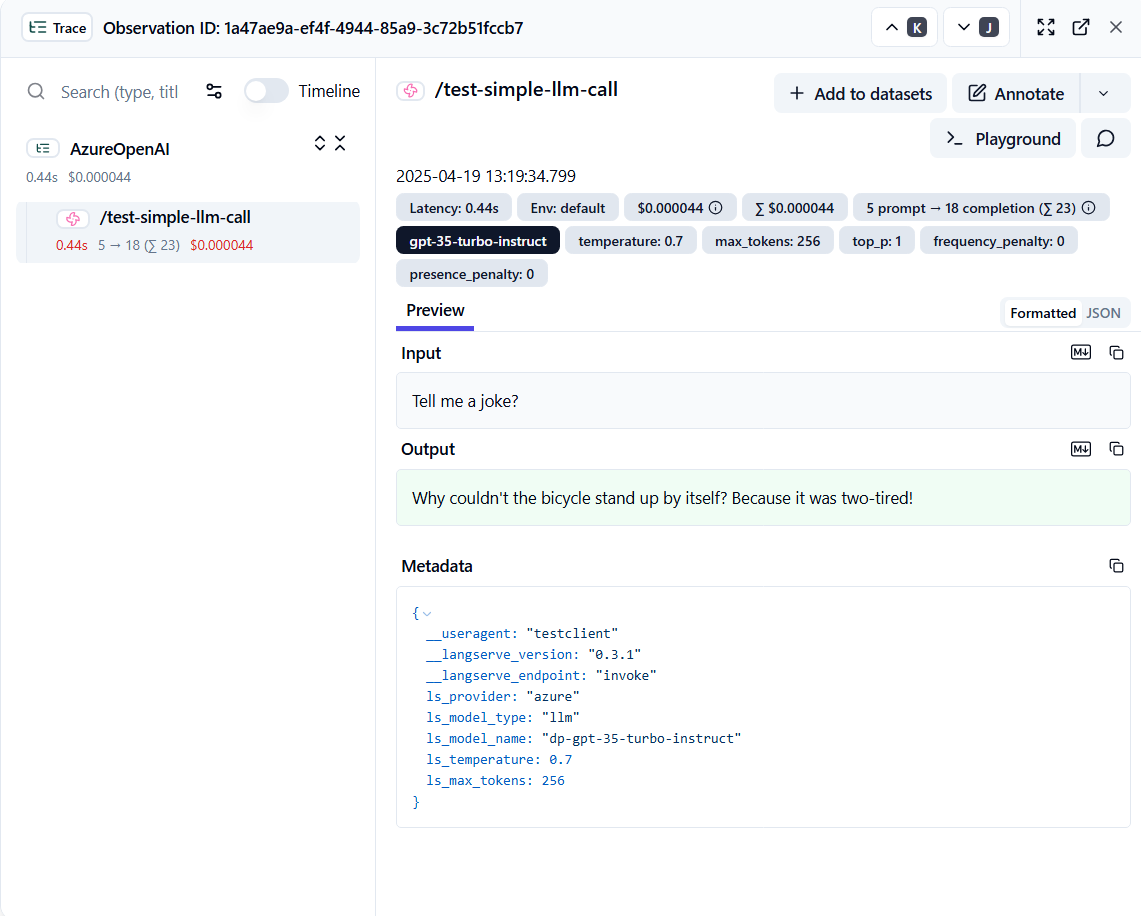

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema import StrOutputParser
from langserve import add_routes

# Create Chain
prompt = ChatPromptTemplate.from_template("Tell me a joke about {topic}")

chain = prompt | llm | StrOutputParser()

# Add new route
add_routes(
    app,
    chain.with_config(config),
    path="/test-chain",
)

# Test chain route
response = client.post("/test-chain/invoke", json={"input": {"topic": "Berlin"}})

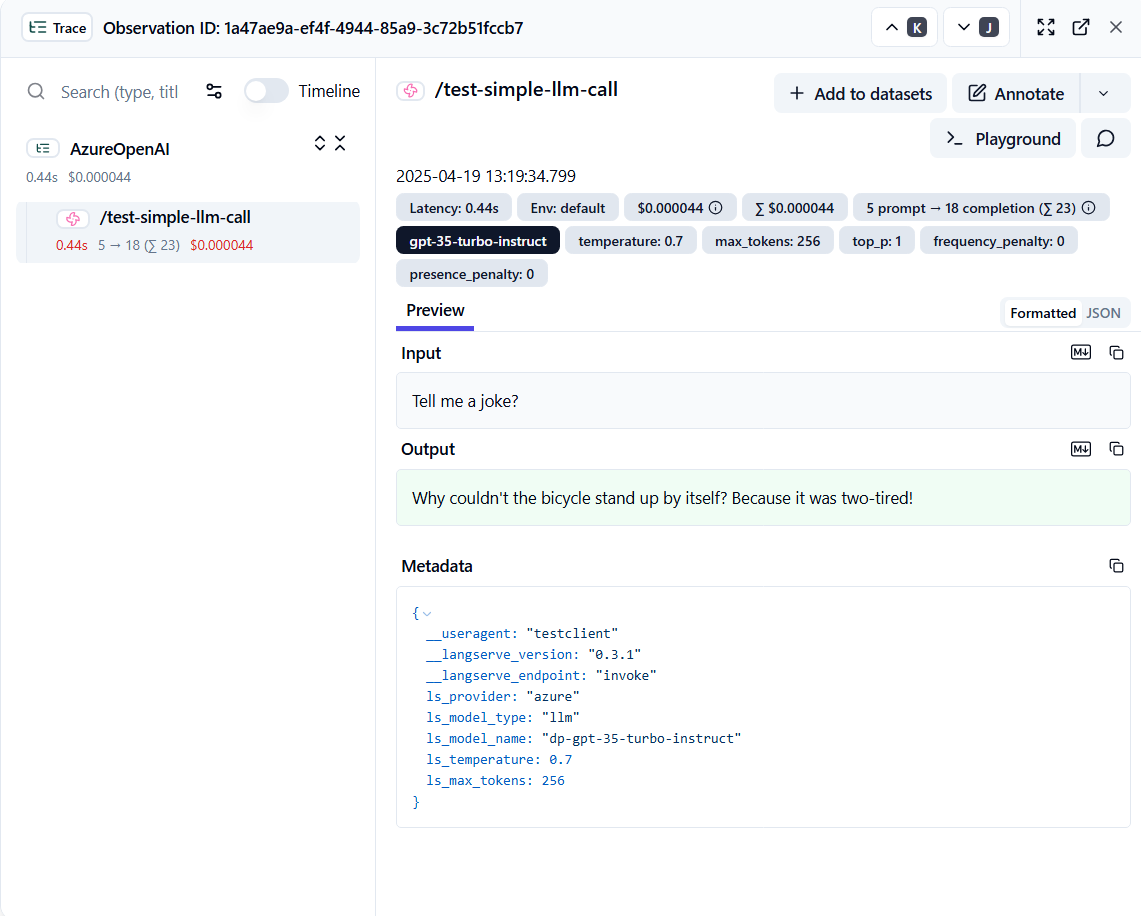

In [ ]:
!pip install langchain_community

  Using cached langchain_community-0.3.21-py3-none-any.whl.metadata (2.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00


## LangGraph

In [ ]:

from langgraph.graph import StateGraph, START, END
from langchain_openai import OpenAI
from langchain.prompts import PromptTemplate
from typing_extensions import TypedDict

# Define state using TypedDict (recommended approach)
class QueryState(TypedDict):
    query: str

def process_query(state: QueryState) -> QueryState:
    response = llm.invoke(f"Answer this question: {state['query']}")
    return {"query": response}

# Create the graph
workflow = StateGraph(QueryState)
workflow.add_node("process", process_query)
workflow.add_edge(START, "process")
workflow.add_edge("process", END)
app = workflow.compile()

# Run the graph
initial_state = {"query": "What is LangGraph?"}
result = app.invoke(initial_state)
print(result["query"])



LangGraph is a language model that is trained on large amounts of text data and uses artificial intelligence to generate human-like text. It can be used for various applications such as text summarization, chatbots, and natural language processing.


This above code defines a simple LangGraph workflow that processes a user query using an OpenAI LLM (Language Model). It starts by defining a TypedDict to represent the state structure, which contains a single field, "query". A node function process_query is created to take the current state, invoke the LLM with a prompt based on the query, and return a new state containing the model’s response. A StateGraph is then constructed with this node as both the entry and exit point, compiled into an executable app, and run with an initial query. The final output is the model’s answer to the given question.

In [ ]:
from langgraph.graph import StateGraph
from typing import TypedDict

# Define a simple state
class SimpleState(TypedDict):
    message: str

# Define a simple node function
def capitalize_message(state: SimpleState) -> SimpleState:
    return {"message": state["message"].upper()}

# Define another simple node function
def add_exclamation(state: SimpleState) -> SimpleState:
    return {"message": state["message"] + "!"}

# Create the graph
workflow = StateGraph(SimpleState)

# Add nodes
workflow.add_node("capitalize", capitalize_message)
workflow.add_node("exclaim", add_exclamation)

# Connect nodes
workflow.add_edge("capitalize", "exclaim")

# Set entry and finish points
workflow.set_entry_point("capitalize")
workflow.set_finish_point("exclaim")

# Compile the graph
app = workflow.compile()

# Run the workflow
initial_state = {"message": "hello world"}
final_state = app.invoke(initial_state)

print(final_state["message"])  # Outputs: "HELLO WORLD!"

HELLO WORLD!


In [ ]:
from langgraph.graph import StateGraph
from typing import TypedDict
import graphviz

# Define a simple state
class SimpleState(TypedDict):
    message: str

# Define node functions
def capitalize_message(state: SimpleState) -> SimpleState:
    return {"message": state["message"].upper()}

def add_exclamation(state: SimpleState) -> SimpleState:
    return {"message": state["message"] + "!"}

# Create the graph
workflow = StateGraph(SimpleState)
workflow.add_node("capitalize", capitalize_message)
workflow.add_node("exclaim", add_exclamation)
workflow.add_edge("capitalize", "exclaim")
workflow.set_entry_point("capitalize")
workflow.set_finish_point("exclaim")

# Create a visualization manually
dot = graphviz.Digraph(comment='LangGraph Workflow')

# Add nodes to visualization
dot.node('capitalize', 'Capitalize')
dot.node('exclaim', 'Add Exclamation')
dot.node('START', 'Start', shape='circle')
dot.node('END', 'End', shape='doublecircle')

# Add edges
dot.edge('START', 'capitalize')
dot.edge('capitalize', 'exclaim')
dot.edge('exclaim', 'END')

# Render the graph
dot.render('workflow_graph', format='png', cleanup=True)
print("Graph visualization saved as 'workflow_graph.png'")

# Compile and run as before
app = workflow.compile()
initial_state = {"message": "hello world"}
final_state = app.invoke(initial_state)
print(final_state["message"])

Graph visualization saved as 'workflow_graph.png'
HELLO WORLD!


This above code defines and visualizes a simple LangGraph workflow using two transformation nodes on a string message. A SimpleState dictionary holds the message, which is first passed through a capitalize_message node that converts it to uppercase, and then through an add_exclamation node that appends an exclamation mark. The StateGraph is built by adding nodes and connecting them via edges, setting entry and finish points. A graphviz diagram is also created to visually represent the workflow. The graph is compiled and executed with an initial message "hello world", resulting in the output "HELLO WORLD!", and a PNG image of the graph is saved as workflow_graph.png.

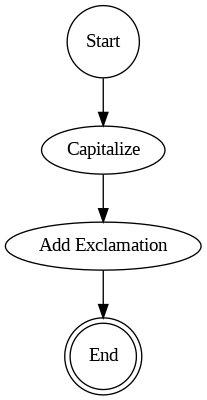

In [ ]:
from IPython.display import Image

# Render and show the image inline
dot.render('workflow_graph', format='png', cleanup=False)
Image(filename='workflow_graph.png')